# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [132]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [133]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [134]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [135]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [136]:
data.shape

(5391, 6)

In [137]:
data.isna().any()

Rank                     False
Release_Date             False
Movie_Title              False
USD_Production_Budget    False
USD_Worldwide_Gross      False
USD_Domestic_Gross       False
dtype: bool

In [138]:
data.duplicated().any()

False

In [139]:
duplicated_rows = data[data.duplicated()]
len(duplicated_rows)

0

In [140]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [141]:
data.columns[3:].values

array(['USD_Production_Budget', 'USD_Worldwide_Gross',
       'USD_Domestic_Gross'], dtype=object)

In [142]:
for col in data.columns[3:]:
  data[col] = data[col].astype(str).str.strip('$')
  data[col] = data[col].astype(str).str.replace(',', '')
  data[col] = pd.to_numeric(data[col])
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [143]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget     int64
USD_Worldwide_Gross       int64
USD_Domestic_Gross        int64
dtype: object

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [144]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object

In [145]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [146]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [147]:
data.iloc[data[['USD_Production_Budget']].idxmin()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [148]:
data.iloc[data[['USD_Production_Budget']].idxmax()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [149]:
len(data[data['USD_Domestic_Gross'] == 0])

512

In [150]:
data.value_counts(subset=data['USD_Domestic_Gross'] == 0)

USD_Domestic_Gross
False    4879
True      512
dtype: int64

In [151]:
data[data['USD_Domestic_Gross'] == 0].sort_values('USD_Production_Budget', ascending=False)[:10]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [152]:
data[data['USD_Worldwide_Gross'] == 0].sort_values('USD_Production_Budget', ascending=False)[:10]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5092,1435,2015-12-31,The Crow,40000000,0,0
3300,1631,2008-12-31,Black Water Transit,35000000,0,0
5045,1656,2015-10-30,Freaks of Nature,33000000,0,0


### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [153]:
data.query('USD_Worldwide_Gross != 0 and USD_Domestic_Gross	== 0').sort_values('USD_Production_Budget', ascending=False)[:10]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0
5091,1271,2015-12-31,Pourquoi j'ai pas mangé mon père,42000000,182156,0
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0
4763,1434,2014-12-31,Dragon Nest Warriors' Dawn,40000000,196090,0
5271,1433,2016-11-11,USS Indianapolis: Men of Courage,40000000,1079040,0
4371,1432,2013-04-16,Un monstre à Paris,40000000,27000381,0
3208,1472,2008-08-26,Virgin Territory,38000000,5473041,0
3539,1489,2009-12-31,Obitaemyy ostrov,36500000,15000000,0


Another approach is to use the .loc[] property combined with the bitwise and & operator.

Why does this work? Pandas is built on top of NumPy, which uses Python's bitwise operators. And these bitwise operators allow us to do comparisons on an element by element basis in both NumPy and Pandas.

Because the bitwise operator takes precedence, we need to include parentheses () around the comparisons we'd like to prioritise.

In [154]:
# ALTERNATIVE
data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)].sort_values('USD_Production_Budget', ascending=False)[:10]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0
5091,1271,2015-12-31,Pourquoi j'ai pas mangé mon père,42000000,182156,0
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0
4763,1434,2014-12-31,Dragon Nest Warriors' Dawn,40000000,196090,0
5271,1433,2016-11-11,USS Indianapolis: Men of Courage,40000000,1079040,0
4371,1432,2013-04-16,Un monstre à Paris,40000000,27000381,0
3208,1472,2008-08-26,Virgin Territory,38000000,5473041,0
3539,1489,2009-12-31,Obitaemyy ostrov,36500000,15000000,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [155]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [156]:
unreleased_movies = data[data['Release_Date'] > scrape_date]
unreleased_movies

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [157]:
len(unreleased_movies)

7

In [158]:
data_clean = data.drop(index=unreleased_movies.index)
len(data_clean[data_clean['Release_Date'] > scrape_date])

0

### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [159]:
no_revenue_movies = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
no_revenue_movies

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,1000000,130874,130874
5373,2161,2017-08-25,Tulip Fever,25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


In [160]:
no_revenue_movies_perc = len(no_revenue_movies.index) / len(data_clean.index) * 100
no_revenue_movies_perc

37.27711738484398

# Seaborn for Data Viz: Bubble Charts

In [161]:
import seaborn as sns

To create a .scatterplot(), all we need to do is supply our DataFrame and the column names that we'd like to see on our axes.

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

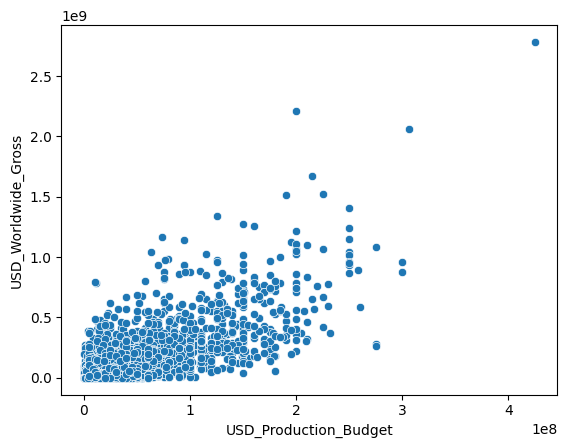

In [162]:
sns.scatterplot(data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')

Because Seaborn is built on top of Matplotlib, we can dive into the Matplotlib layer anytime to configure our chart. For example, we can increase the size of our figure:

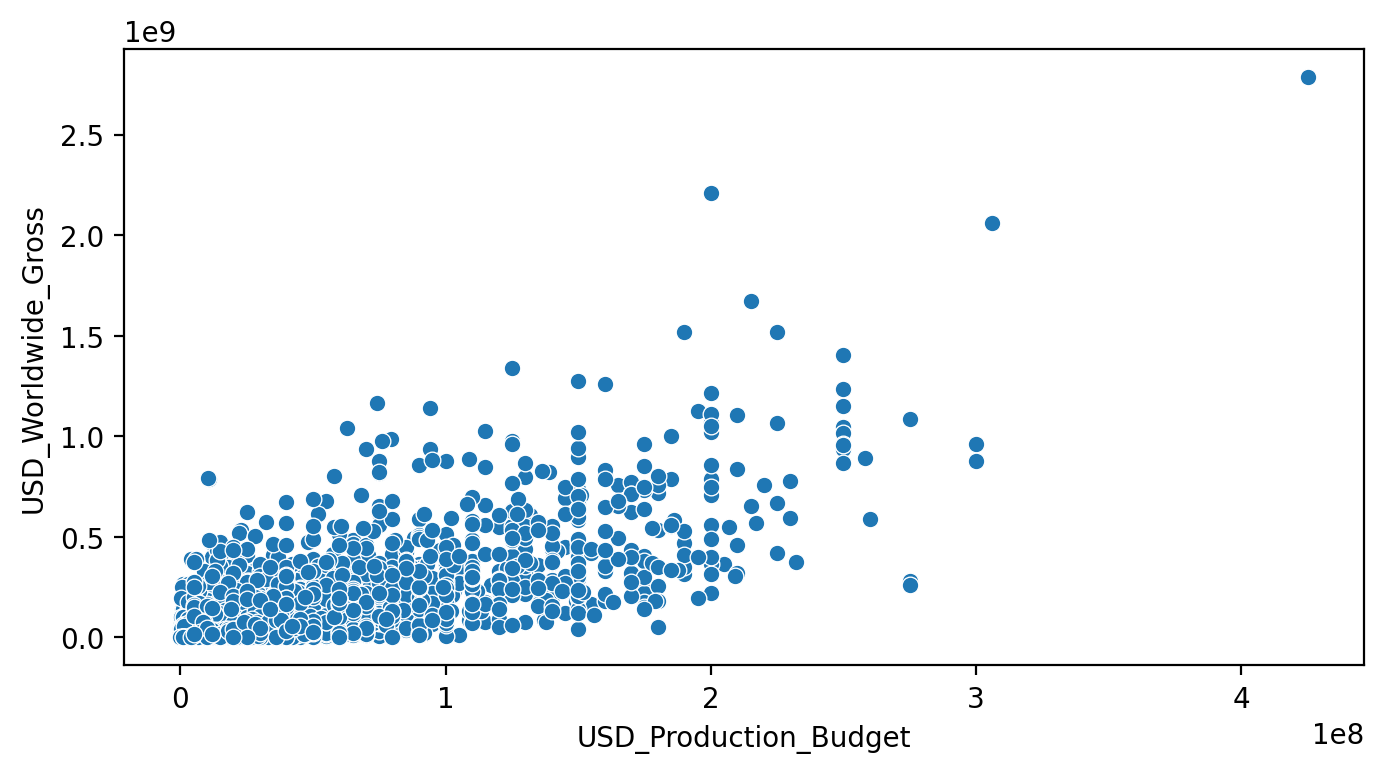

In [163]:
plt.figure(figsize=(8, 4), dpi=200)
sns.scatterplot(data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')
plt.show()

And to style our chart we can simply configure the Axes object that is returned from sns.scatterplot().

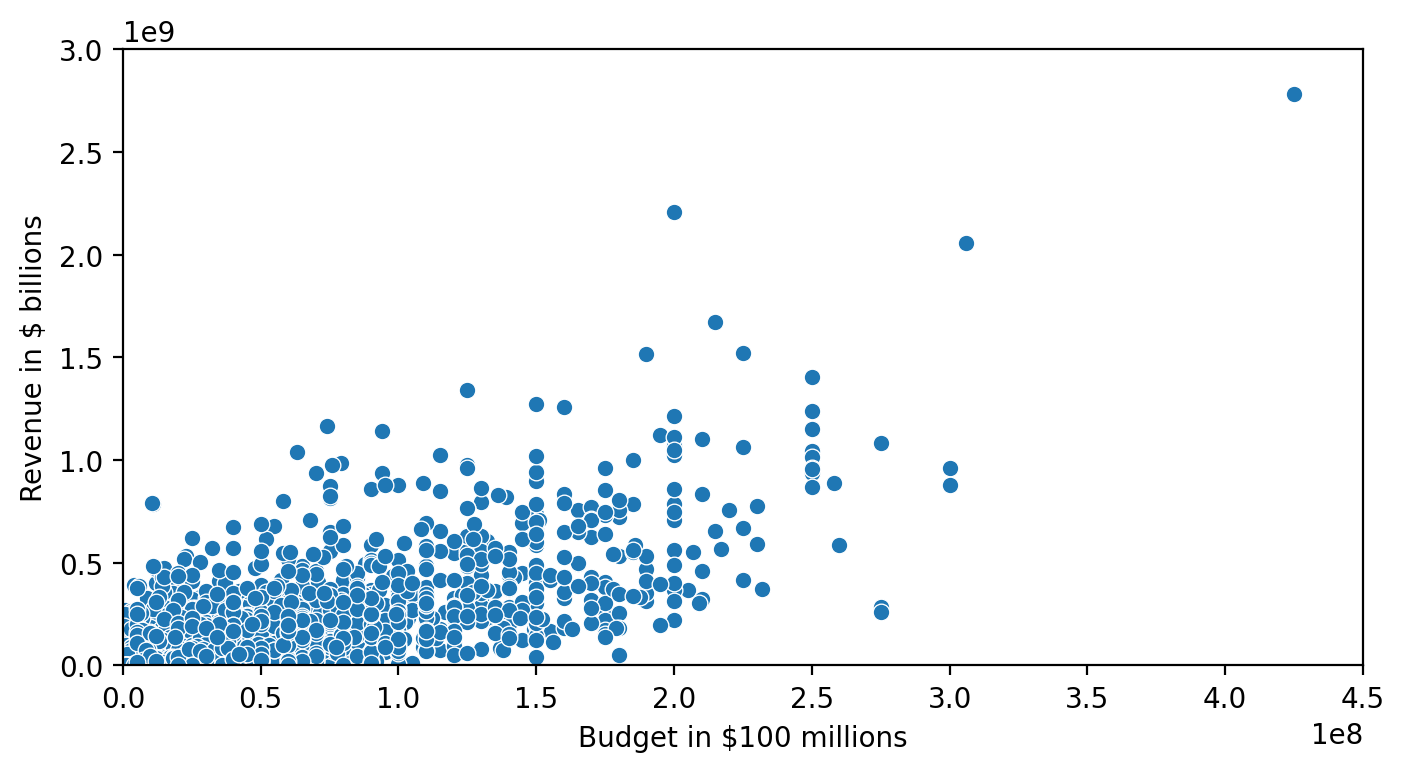

In [164]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross')
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
plt.show()

But the reason we're using Seaborn is because of the **hue** and **size** parameters that make it very easy to create a bubble chart. These parameters allow us to colour the data and change their size according to one of the columns in our DataFrame.

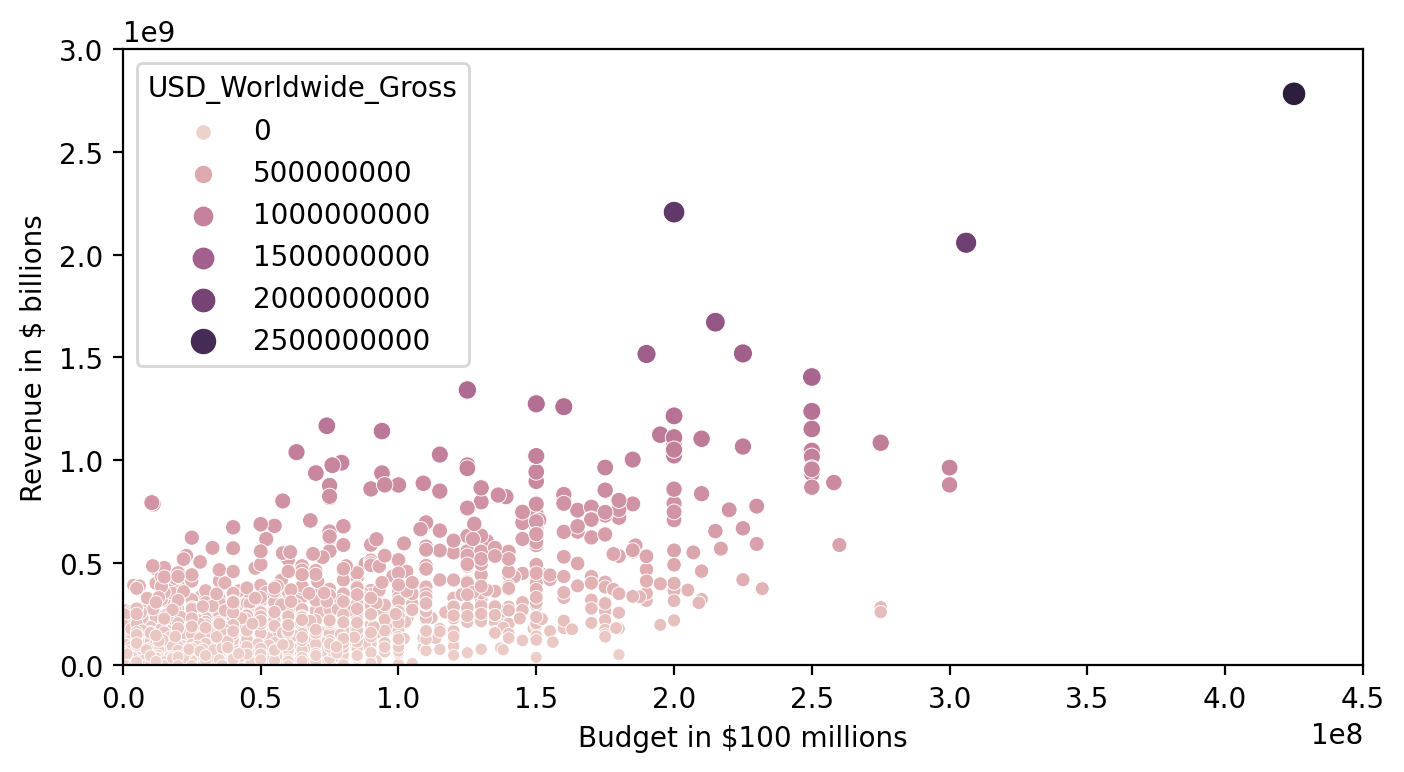

In [165]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)

plt.show()

Now our higher grossing movies are bigger and darker on our chart. That's super handy. But Seaborn offers a number of convenient styling options as well.

To set the styling on a single chart (as opposed to all the charts in the entire notebook) we can use Python's with keyword. We've seen **with** used already when it comes to opening files in previous lessons.

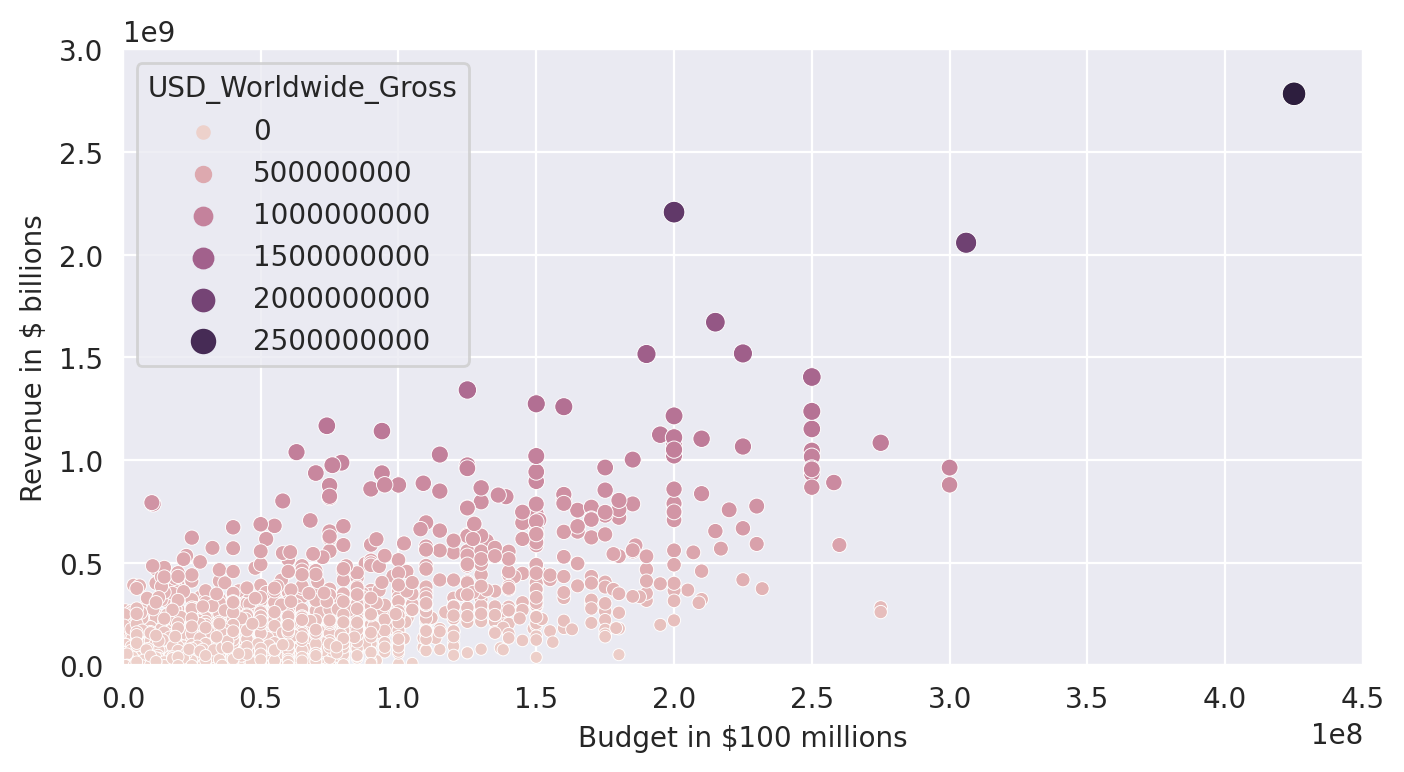

In [166]:
plt.figure(figsize=(8,4), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget',
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

In addition to 'darkgrid', Seaborn has a number of built-in themes. so you can style your chart very quickly. Try out 'whitegrid', 'dark',  or 'ticks' for example.

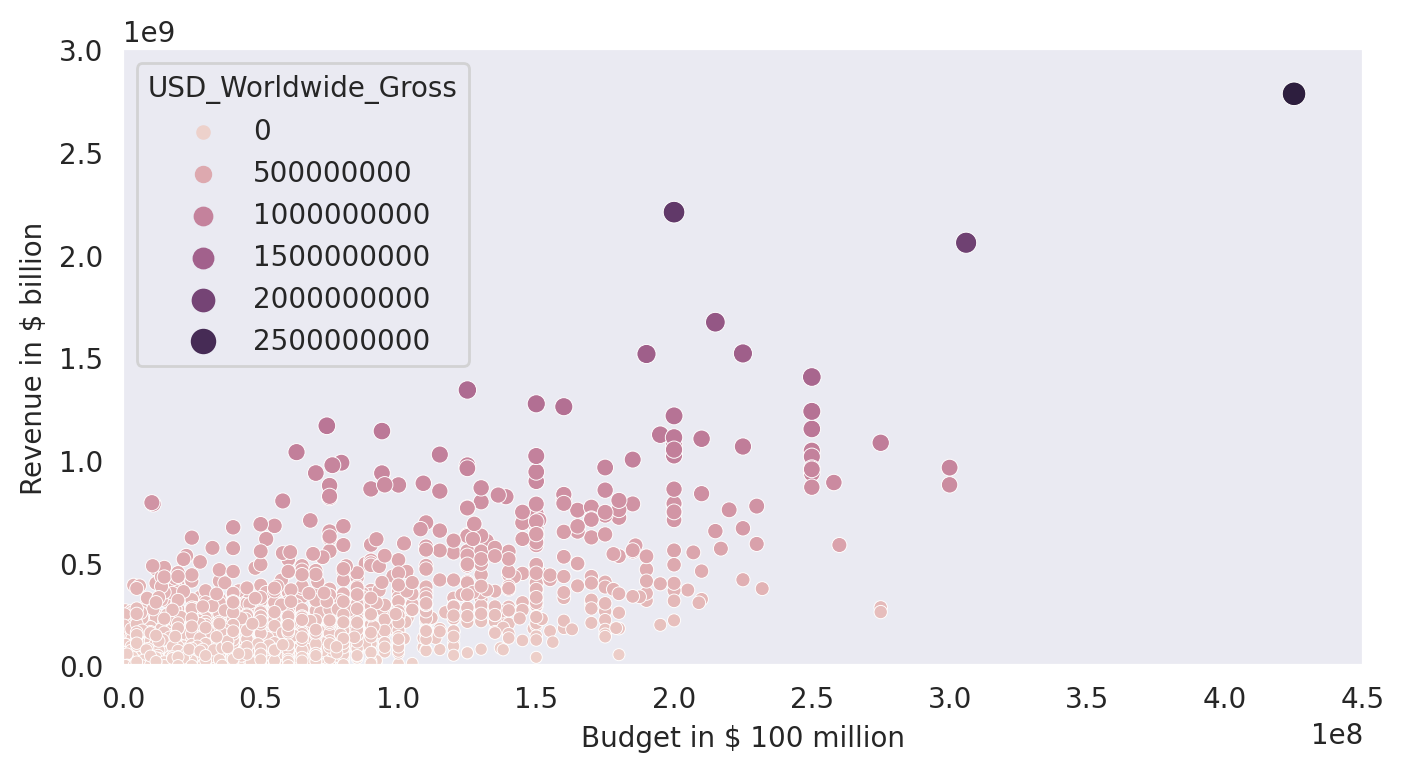

In [167]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('dark'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget',
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         xlabel='Budget in $ 100 million',
         ylabel='Revenue in $ billion')

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://img-c.udemycdn.com/redactor/raw/2020-10-15_09-44-00-eac16a0a1c99356a123eb410d99157ec.png>



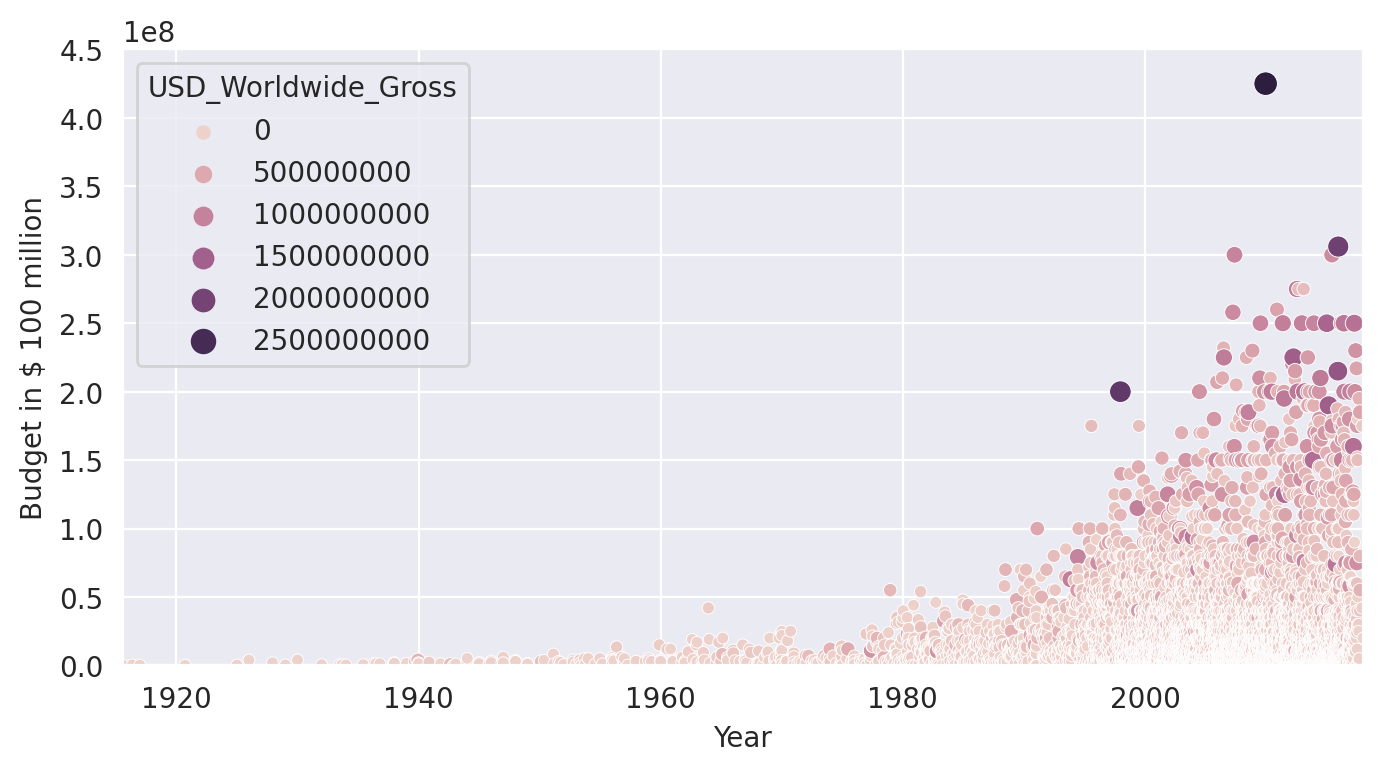

In [168]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='Release_Date',
                       y='USD_Production_Budget',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
  ax.set(ylim=(0, 450000000),
         xlim=(data_clean.Release_Date.min(),
               data_clean.Release_Date.max()),
         ylabel='Budget in $ 100 million',
         xlabel='Year')

What do we see here? What is this chart telling us? Well, first off, movie budgets have just exploded in the last 40 years or so. Up until the 1970s, the film industry appears to have been in an entirely different era. Budgets started growing fast from the 1980s onwards and continued to grow through the 2000s. Also, the industry has grown massively, producing many more films than before. The number of data points is so dense from 2000 onwards that they are overlapping.

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

To create a DatetimeIndex, we just call the constructor and provide our release date column as an argument to initialise the DatetimeIndex object. Then we can extract all the years from the DatetimeIndex.

In [169]:
dt_index = pd.DatetimeIndex(data=data_clean['Release_Date'])
years = dt_index.year
years

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)

Now, all we need to do is convert the years to decades. For that, we will use floor division (aka integer division). The difference to regular division is that the result is effectively rounded down.

In our case, we will use the floor division by 10 and then multiplication by 10 to convert the release year to the release decade:

In [170]:
data_clean['Decade'] = (years // 10) * 10
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


In [171]:
# ALTERNATIVE
data_clean['Decade'] = (data_clean['Release_Date'].dt.year // 10) * 10
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [172]:
old_films = data_clean.query('Decade < 1970')
old_films.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,6000000,102308900,102308900,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
151,3613,1969-12-18,On Her Majesty's Secret Service,8000000,82000000,22800000,1960
152,4195,1969-12-19,Topaz,4000000,6000000,6000000,1960


In [173]:
len(old_films)

153

In [174]:
old_films.iloc[old_films[['USD_Production_Budget']].idxmax()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960


In [175]:
new_films = data_clean.query('Decade >= 1970')
new_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970


# Seaborn Regression Plots

Let's visualise the relationship between the movie budget and the worldwide revenue using linear regression. Seaborn makes this incredibly easy with the .regplot() function.

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

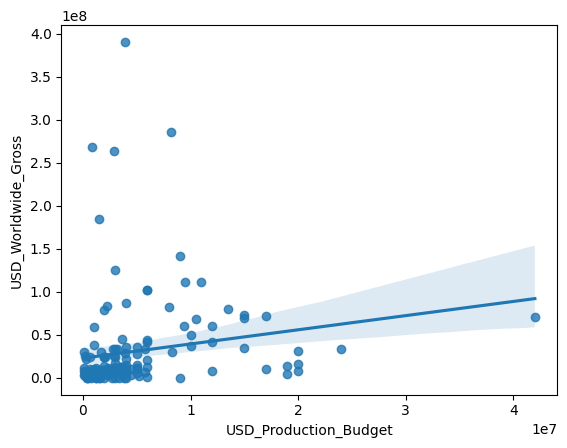

In [176]:
sns.regplot(data=old_films, x='USD_Production_Budget', y='USD_Worldwide_Gross')

This creates a scatter plot and draws a linear regression line together with the confidence interval at the same time.

To style the chart further, we can once again, drop into the Matplotlib layer and supply keyword arguments as dictionaries. We can customise the scatter plot (e.g., by changing the transparency of the dots) and the regression line itself (e.g., by changing the colour).

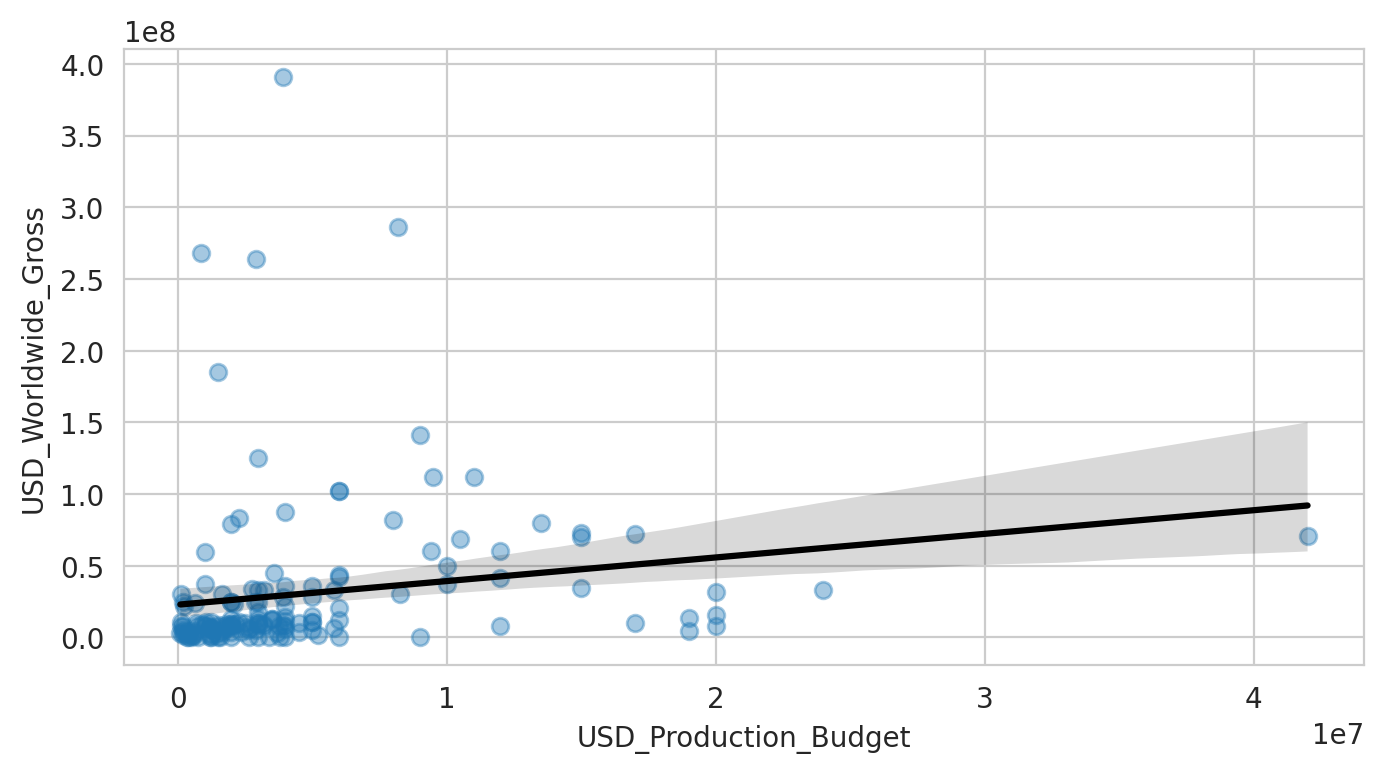

In [177]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('whitegrid'):
  ax = sns.regplot(data=old_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   scatter_kws={'alpha': 0.4},
                   line_kws={'color': 'black'})

What do we see here? Well, first off we can spot Cleopatra on the far right. But also, we see that many lower budget films made much more money! The relationship between the production budget and movie revenue is not very strong. Many points on the left are very far away for the line, so the line appears not to capture the relationship between budget and revenue very well at all!

But does the same hold true for the newer films?

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

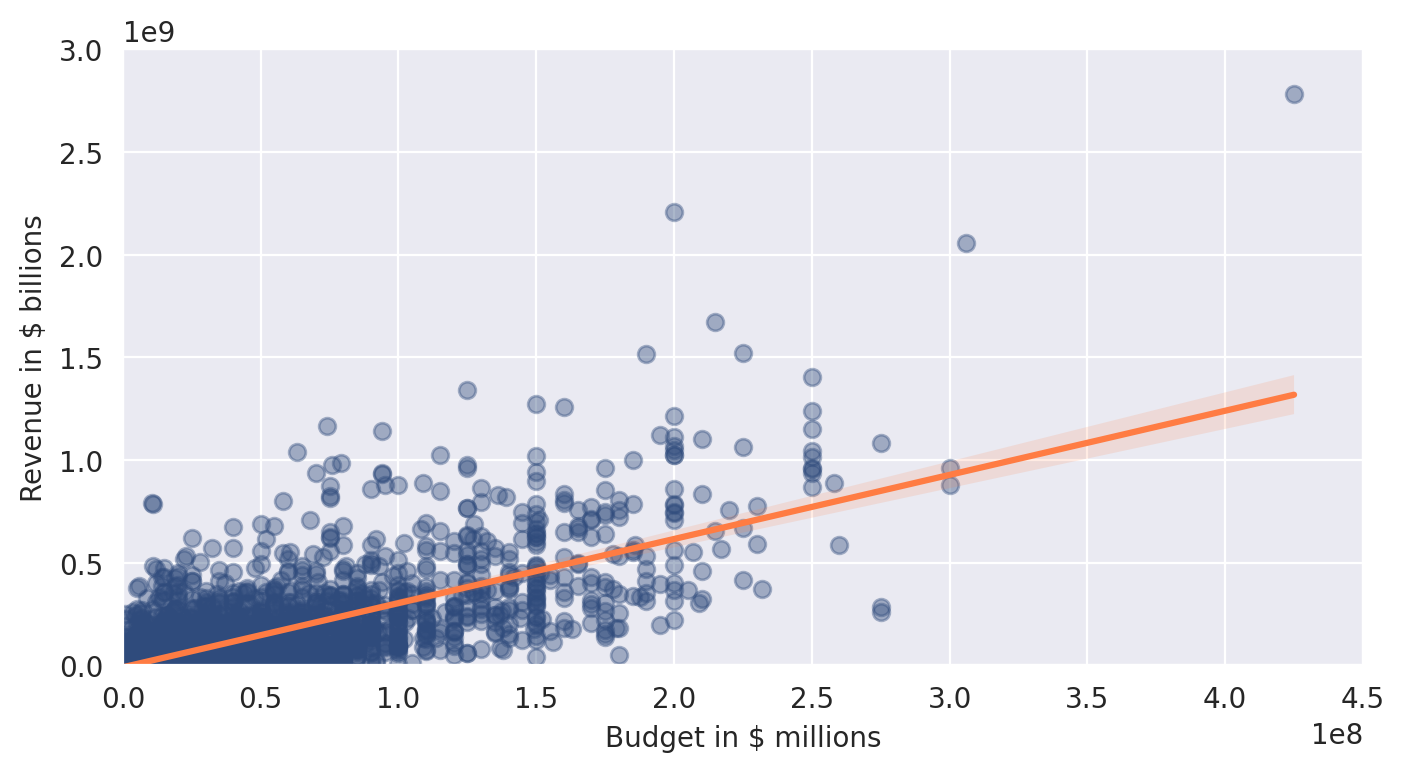

In [178]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style(style='darkgrid'):
  ax = sns.regplot(data=new_films,
                   y='USD_Worldwide_Gross',
                   x='USD_Production_Budget',
                   color='#2f4b7c',
                   scatter_kws={'alpha': 0.4},
                   line_kws={'color': '#ff7c43'})
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $ millions')

This time we are getting a much better fit, compared to the old films. We can see this visually from the fact that our data points line up much better with our regression line (pun intended). Also, the confidence interval is much narrower. We also see that a film with a \$150 million budget is predicted to make slightly under \$500 million by our regression line.

All in all, we can be pretty confident that there does indeed seem to be a relationship between a film's budget and that film's worldwide revenue.

But how much of the variation in revenue does the budget actually explain? And how much extra revenue can we expect for an additional $1 increase in the budget? To find out, we need to dive into the numbers underlying our regression model.

# Run Your Own Regression with scikit-learn

Let's dive into our linear regression model a bit more.

A regression line is a mathematical line that represents the statistical relationship between two variables. It is commonly used in regression analysis to model and predict the relationship between an independent variable (X) and a dependent variable (Y).

In a scatterplot, the regression line can be visualized as the "best" straight line that fits the data points. There are two main types of regression lines:

* Simple Linear (univariate) Regression: It is used when there is a single independent variable that is related to a dependent variable. The equation of the simple linear regression line is of the form $Y=b+mX$, where $b$ is the ordinate to the origin and $m$ is the slope.

* Multiple Linear (multivariate) Regression: Used when there are multiple independent variables that are related to a dependent variable. The equation of the multiple linear regression line is of the form $Y= b_0 + b_1X_1 + b_2X_2 + ... + b_nX_n$, where $b_0$ is the ordinate to the origin and $b_1, b_2,..., b_n$ are the slopes for the independent variables $X_1, X_2,..., X_n$.

The regression line provides a visual representation of the overall trend of the data and can be used to make predictions based on new values of the independent variable. In a scatter plot, the data points are scattered around the regression line, and the shape and slope of the line indicate the nature of the relationship between the variables. If the points align close to the line, it indicates a stronger relationship, while a wider spread suggests a weaker relationship.

At the moment we have being using a univariate regression. This is a regression with a single explanatory variable (our movie BUDGET). Explanatory variables are also referred to as features in machine learning terminology.

Using our data on budgets, the linear regression estimates the best possible line to fit our movie revenues.

The regression line has the following structure:

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-16_15-19-24-b9cd86771c12cda554da251a16471df9.png">

To find the best possible line, our regression will estimate the y-intercept ("theta zero") and the slope ("theta one"). The line's intercept on the y-axis tells us how much revenue a movie would make if the budget was 0. The slope tells us how much extra revenue we get for a $1 increase in the movie budget.

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-16_15-31-02-3bdbeb669ce3d7ecebe72abb986e8d35.png">

So how can we find out what our model's estimates are for theta-one and theta-zero? And how can we run our own regression, regardless of whether we want to visualise it on a chart? For that, we can use scikit-learn.

In [179]:
from sklearn.linear_model import LinearRegression

Now we can run a LinearRegression. First, let's create a LinearRegression object that will do the work for us.

In [180]:
regression = LinearRegression()

Now we should specify our features and our targets (i.e., our response variable). You will often see the features named capital X and the target named lower case y:

In [181]:
# Explanatory variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

Our LinearRegression does not like receiving Pandas Series (e.g., new_films\['USD_Production_Budget'\]), so we've created some new DataFrames.

Now it's time to get to work and run the calculations:

In [182]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

That's it. Now we can look at the values of theta-one and theta-zero from the equation above.

In [183]:
# Theta zero
regression.intercept_

array([-8650768.00661027])

In [184]:
# Theta one
regression.coef_

array([[3.12259592]])

Both intercept_ and coef_ are simply attributes of the LinearRegression object. Don't worry about the underscores at the end, these are simply part of the attribute names that the scikit-learn developers have chosen.

How do we interpret the y-intercept? Literally, means that if a movie budget is \$0, the estimated movie revenue is -\$8.65 million. Hmm... so this is clearly unrealistic. Why would our model tell us such nonsense? Well, the reason is that we are specifying what the model should be ahead of time - namely a straight line - and then finding the best straight line for our data. Considering that you can't have negative revenue or a negative budget, we have to be careful about interpreting our very simple model too literally. After all, it's just an estimate and this estimate will be the most accurate on the chart where we have the most data points (rather than at the extreme left or right).

What about the slope? The slope tells us that for every extra $1 in the budget, movie revenue increases by \$3.1. So, that's pretty interesting. That means the higher our budget, the higher our estimated revenue. If budgets are all that matter to make lots of money, then studio executives and film financiers should try and produce the biggest films possible, right? Maybe that's exactly why we've seen a massive increase in budgets over the past 30 years.

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-16_16-23-44-7a1c656b072897f661cc8efdfca94144.png">

**R-Squared: Goodness of Fit**

One measure of figuring out how well our model fits our data is by looking at a metric called r-squared. This is a good number to look at in addition to eyeballing our charts.

In [185]:
# R-Squared
regression.score(X, y)

0.5577032617720403

We see that our r-squared comes in at around 0.558. This means that our model explains about 56% of the variance in movie revenue. That's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable. The real world is super complex, so in many academic circles, if a researcher can build a simple model that explains over 50% or so of what is actually happening, then it's a pretty decent model.

Remember how we were quite sceptical about our regression looking at the chart for our old_films?

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [188]:
old_regression = LinearRegression()
old_X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
old_y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
old_regression.fit(old_X, old_y)

LinearRegression()

In [189]:
old_regression.intercept_

array([22821538.63508039])

In [190]:
old_regression.coef_

array([[1.64771314]])

In [191]:
old_regression.score(old_X, old_y)

0.02937258620576877

Running the numbers this time around, we can confirm just how inappropriate the linear model is for the pre-1970 films. We still see a positive relationship between budgets and revenue, since the slope (our theta-one) is 1.6, but the r-squared is very low.

This makes sense considering how poorly our data points aligned with our line earlier.

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-16_16-43-08-86be88ceaa656f3a0c07f04d3cf0dac7.png">

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [201]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0, 0] * budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate/1000000:.0f}M.')

The estimated revenue for a $350 film is around $1084M.


The colon : and dot . in a print statement is quite handy for controlling the number of digits you'd like to show up in the output.